# Import libraries

In [1]:
import pandas as pd

# Loading data for a Dataframe

In [5]:
data = pd.read_csv('./Pokemon.csv', index_col='#') # ID Column is "#"
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Pandas series

In [7]:
# We can access to the dataframe's columns as a dictionari or object
type(data['Name'])
type(data.Name)

pandas.core.series.Series

In [8]:
# Both are the same

(data['Name'] == data.Name)

#
1      True
2      True
3      True
3      True
4      True
5      True
6      True
6      True
6      True
7      True
8      True
9      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
15     True
16     True
17     True
18     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
       ... 
700    True
701    True
702    True
703    True
704    True
705    True
706    True
707    True
708    True
709    True
710    True
710    True
710    True
710    True
711    True
711    True
711    True
711    True
712    True
713    True
714    True
715    True
716    True
717    True
718    True
719    True
719    True
720    True
720    True
721    True
Name: Name, Length: 800, dtype: bool

In [9]:
# If we want to check if ALL the rows are the same
(data['Name'] == data.Name).all()

True

## What is the biggest "total"?

In [12]:
biggest_total = data['Total'].max() # 780
biggest_total

780

In [15]:
# Which Pokemons have 780 of total?
mask = (biggest_total == data['Total'])
data[mask] # This are the Pokemons with 780 of total

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


## What is the mean "speed"?

In [16]:
data['Speed'].mean()

68.2775

## Charts of "Attack"

In [17]:
# Magic command to see the charts on the notebook
%matplotlib inline

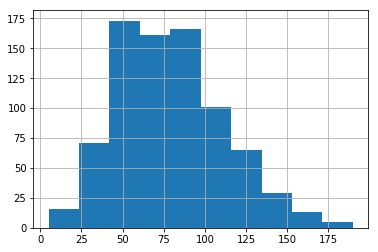

In [19]:
# Historygram
data['Attack'].hist()

# Note: "Attack" is X and the Pokemon ID is Y

## How many "Type 1" and "Type 2" we have?

In [20]:
# Count each value of this column
data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [21]:
data['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Ghost       14
Water       14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

## What is the mean "Total" of "Type 1" and "Type 2"?

In [28]:
data.groupby('Type 2')['Total'].mean().sort_values(ascending=False)

Type 2
Dragon      526.166667
Fighting    525.846154
Ice         525.714286
Fire        506.250000
Steel       485.227273
Dark        484.400000
Psychic     479.060606
Electric    455.333333
Flying      452.546392
Ground      444.342857
Rock        434.642857
Ghost       430.714286
Water       418.214286
Fairy       417.956522
Normal      411.500000
Grass       408.920000
Poison      396.500000
Bug         393.333333
Name: Total, dtype: float64

## What is the maxinum "attack" of the combination of "Type 1" and "Type 2"?

In [30]:
# Group our data by two columns at the same time
data.groupby(['Type 1', 'Type 2'])['Attack'].max().sort_values(ascending=False)

Type 1    Type 2  
Psychic   Fighting    190
Bug       Fighting    185
Ground    Fire        180
Dragon    Flying      180
          Ice         170
          Ground      170
Rock      Dark        164
Fire      Fighting    160
Rock      Fairy       160
Psychic   Dark        160
Water     Dark        155
Bug       Flying      155
          Poison      150
Dragon    Electric    150
Steel     Ghost       150
Water     Ground      150
Bug       Steel       150
Fighting  Steel       145
Steel     Psychic     145
Ground    Flying      145
Rock      Flying      140
Ground    Rock        140
Normal    Fighting    136
Ground    Steel       135
Grass     Ice         132
Dark      Flying      131
Fire      Flying      130
Ice       Ground      130
Dragon    Psychic     130
Grass     Fighting    130
                     ... 
Poison    Dragon       75
Electric  Steel        70
Water     Grass        70
Ground    Psychic      70
Flying    Dragon       70
Normal    Fairy        70
Fire      Psychic  

# Show the data with Seaborn

In [31]:
import seaborn as sns

/home/fran/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


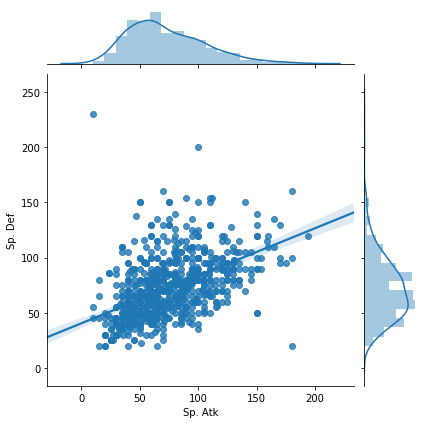

In [33]:
sns.jointplot(x='Sp. Atk', y='Sp. Def', data=data, kind='reg') # kind='reg': Linear regression of X and Y

## Create a boxplot with the columns of which we are interesed

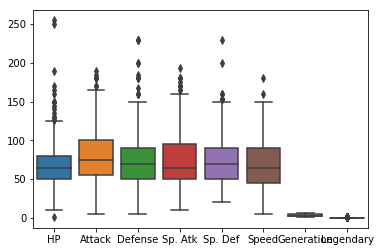

In [38]:
numeric_data = data.drop(['Name', 'Total'], axis=1)
sns.boxplot(data = numeric_data)